In [1]:
import pandas as pd
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import random
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn import metrics
from plot_metric.functions import BinaryClassification
from sklearn.preprocessing import StandardScaler

#read in data 
grad_data = pd.read_csv("c:\\Users\\sarah\\OneDrive\\Documents\\DS3001_ML\\cc_institution_details.csv", encoding='unicode_escape')
grad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 62 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   unitid                                3798 non-null   int64  
 1   chronname                             3798 non-null   object 
 2   city                                  3798 non-null   object 
 3   state                                 3798 non-null   object 
 4   level                                 3798 non-null   object 
 5   control                               3798 non-null   object 
 6   basic                                 3798 non-null   object 
 7   hbcu                                  94 non-null     object 
 8   flagship                              50 non-null     object 
 9   long_x                                3798 non-null   float64
 10  lat_y                                 3798 non-null   float64
 11  site             

In [190]:
grad_data.shape
#3798 rows and 62 columns 

(3798, 62)

In [191]:
#drop missing data, within range and additional list 
to_drop = list(range(39, 56))
to_drop.extend([27, 9, 10, 11, 28, 36, 60, 56])

In [192]:
#drop missing data 
grad_data1 = grad_data.drop(grad_data.columns[to_drop], axis=1)
grad_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   unitid                  3798 non-null   int64  
 1   chronname               3798 non-null   object 
 2   city                    3798 non-null   object 
 3   state                   3798 non-null   object 
 4   level                   3798 non-null   object 
 5   control                 3798 non-null   object 
 6   basic                   3798 non-null   object 
 7   hbcu                    94 non-null     object 
 8   flagship                50 non-null     object 
 9   student_count           3798 non-null   int64  
 10  awards_per_value        3798 non-null   float64
 11  awards_per_state_value  3798 non-null   float64
 12  awards_per_natl_value   3798 non-null   float64
 13  exp_award_value         3798 non-null   int64  
 14  exp_award_state_value   3798 non-null   

In [193]:
#drop nonpredictive columms 
drop_more = [0,2,3,6,8,11,12,14,15,18,21,23,29,32,33,34,35]
grad_data2 = grad_data1.drop(grad_data1.columns[drop_more], axis=1)
grad_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   chronname             3798 non-null   object 
 1   level                 3798 non-null   object 
 2   control               3798 non-null   object 
 3   hbcu                  94 non-null     object 
 4   student_count         3798 non-null   int64  
 5   awards_per_value      3798 non-null   float64
 6   exp_award_value       3798 non-null   int64  
 7   exp_award_percentile  3798 non-null   int64  
 8   ft_pct                3794 non-null   float64
 9   fte_percentile        3798 non-null   int64  
 10  med_sat_value         1337 non-null   float64
 11  aid_value             3797 non-null   float64
 12  grad_100_value        3467 non-null   float64
 13  grad_100_percentile   3467 non-null   float64
 14  grad_150_value        3467 non-null   float64
 15  grad_150_percentile  

In [194]:
grad_data2.head()

,chronname,level,control,hbcu,student_count,awards_per_value,exp_award_value,exp_award_percentile,ft_pct,fte_percentile,med_sat_value,aid_value,grad_100_value,grad_100_percentile,grad_150_value,grad_150_percentile,pell_value,retain_value,ft_fac_value,cohort_size
0,Alabama A&M University,4-year,Public,X,4051,14.2,105331,90,93.8,33,823.0,7142.0,10.0,15.0,29.1,14.0,71.2,63.1,82.8,882.0
1,University of Alabama at Birmingham,4-year,Public,NaN,11502,20.9,136546,97,72.7,67,1146.0,6088.0,29.4,67.0,53.5,66.0,35.1,80.2,92.4,1376.0
2,Amridge University,4-year,Private not-for-profit,NaN,322,29.9,58414,30,62.7,12,NaN,2540.0,0.0,0.0,66.7,72.0,68.4,37.5,67.2,3.0
3,University of Alabama at Huntsville,4-year,Public,NaN,5696,20.9,64418,61,74.4,40,1180.0,6647.0,16.5,34.0,48.4,54.0,32.8,81.0,65.5,759.0
4,Alabama State University,4-year,Public,X,5356,11.6,132407,96,91.0,41,830.0,7256.0,8.8,11.0,25.2,9.0,82.7,62.2,67.0,1351.0


In [195]:
#replaces NULL value with NaN value
import numpy as np
grad_data2.replace('NULL', np.nan, inplace=True)

In [196]:
#replaces NaN with number values 
grad_data2['hbcu'] = [1 if grad_data2['hbcu'][i]=='X' else 0 for i in range(len(grad_data2['hbcu']))]
grad_data2['hbcu'].value_counts()

hbcu
0    3704
1      94
Name: count, dtype: int64

In [197]:
#convert columns to categories 
grad_data2['hbcu'] = grad_data2.hbcu.astype('category')
grad_data2[['level', 'control']] = grad_data2[['level', 'control']].astype('category')

In [198]:
grad_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   chronname             3798 non-null   object  
 1   level                 3798 non-null   category
 2   control               3798 non-null   category
 3   hbcu                  3798 non-null   category
 4   student_count         3798 non-null   int64   
 5   awards_per_value      3798 non-null   float64 
 6   exp_award_value       3798 non-null   int64   
 7   exp_award_percentile  3798 non-null   int64   
 8   ft_pct                3794 non-null   float64 
 9   fte_percentile        3798 non-null   int64   
 10  med_sat_value         1337 non-null   float64 
 11  aid_value             3797 non-null   float64 
 12  grad_100_value        3467 non-null   float64 
 13  grad_100_percentile   3467 non-null   float64 
 14  grad_150_value        3467 non-null   float64 
 15  grad

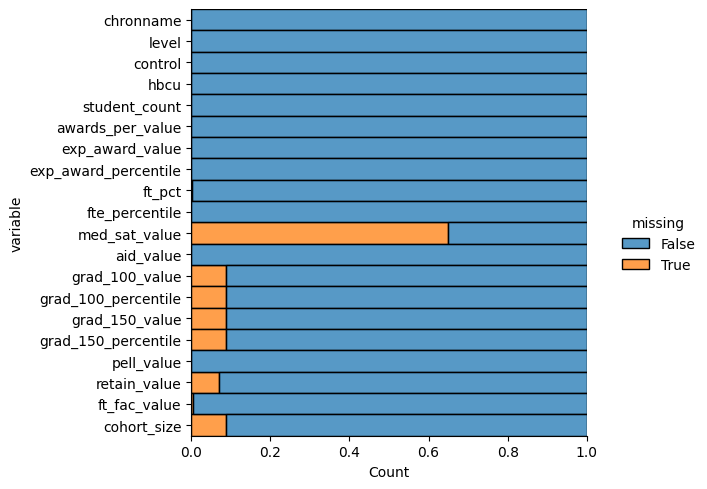

In [199]:
# check missing data
sns.displot(
    data=grad_data2.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)

In [200]:
#drop med_stat_value then delete the rest of the NA rows
grad_data2 = grad_data2.drop(grad_data[['med_sat_value']], axis=1)
grad_data2.dropna(axis = 0, how = 'any', inplace = True)

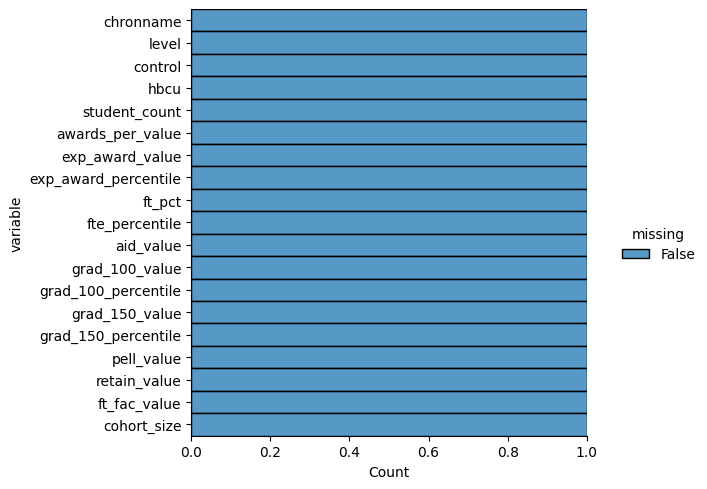

In [201]:
#check missing data again 
sns.displot(
    data=grad_data2.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)

In [202]:
#Question 
#Assuming 4-year schools give more aid, can we determine aid for incoming students based on if they are attending a 4-year or 2-year school?

grad_data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3371 entries, 0 to 3796
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   chronname             3371 non-null   object  
 1   level                 3371 non-null   category
 2   control               3371 non-null   category
 3   hbcu                  3371 non-null   category
 4   student_count         3371 non-null   int64   
 5   awards_per_value      3371 non-null   float64 
 6   exp_award_value       3371 non-null   int64   
 7   exp_award_percentile  3371 non-null   int64   
 8   ft_pct                3371 non-null   float64 
 9   fte_percentile        3371 non-null   int64   
 10  aid_value             3371 non-null   float64 
 11  grad_100_value        3371 non-null   float64 
 12  grad_100_percentile   3371 non-null   float64 
 13  grad_150_value        3371 non-null   float64 
 14  grad_150_percentile   3371 non-null   float64 
 15  pell_valu

In [203]:
# normalize the numeric variables
numeric_cols = grad_data2.select_dtypes(include='int64').columns
print(numeric_cols)

Index(['student_count', 'exp_award_value', 'exp_award_percentile',
       'fte_percentile'],
      dtype='object')


In [204]:
# normalize numeric variables 
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
d = scaler.fit_transform(grad_data2[numeric_cols]) # conduct data transformation
scaled_df = pd.DataFrame(d, columns=numeric_cols) # convert back to pd df;

grad_data2[numeric_cols] = scaled_df # put data back into the main df

grad_data2.describe()

,student_count,awards_per_value,exp_award_value,exp_award_percentile,ft_pct,fte_percentile,aid_value,grad_100_value,grad_100_percentile,grad_150_value,grad_150_percentile,pell_value,retain_value,ft_fac_value,cohort_size
count,3083.000000,3371.000000,3083.000000,3083.000000,3371.000000,3083.000000,3371.000000,3371.000000,3371.000000,3371.000000,3371.000000,3371.000000,3371.000000,3371.000000,3371.000000
mean,0.028538,22.710116,0.012989,0.521395,71.625185,0.516588,8355.173539,28.619371,47.126669,42.901187,49.303471,45.763364,66.699763,47.042539,675.608128
std,0.044812,10.040922,0.022193,0.286257,25.040679,0.288517,6661.113528,23.208964,30.373339,23.172944,29.245419,19.458833,15.995472,24.293820,969.258271
min,0.000000,0.500000,0.000000,0.000000,3.800000,0.000000,294.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.004594,17.100000,0.006494,0.280000,49.750000,0.270000,4074.500000,9.300000,20.000000,23.600000,24.000000,31.600000,56.400000,27.800000,146.000000
50%,0.012327,21.000000,0.010044,0.530000,78.600000,0.530000,5472.000000,23.100000,47.000000,41.700000,49.000000,43.100000,67.100000,44.000000,367.000000
75%,0.033902,25.300000,0.015248,0.770000,94.300000,0.770000,10533.000000,43.900000,73.000000,60.500000,75.000000,58.450000,78.100000,64.400000,802.000000
max,1.000000,131.100000,1.000000,1.000000,100.000000,1.000000,41580.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,16229.000000


In [205]:
# onehot encode the data to convert categorical variables into columns with 0 and 1 rows 
category = grad_data2.select_dtypes(include='category').columns
print(category)

Index(['level', 'control', 'hbcu'], dtype='object')


In [206]:
#one hot encode, get new columns with True or False values 
encoded = pd.get_dummies(grad_data2[category])
encoded.head() 

#confusing hbcu format

,level_2-year,level_4-year,control_Private for-profit,control_Private not-for-profit,control_Public,hbcu_0,hbcu_1
0,False,True,False,False,True,False,True
1,False,True,False,False,True,True,False
2,False,True,False,True,False,True,False
3,False,True,False,False,True,True,False
4,False,True,False,False,True,False,True


In [207]:
# drop the old columns and join new encoded columns 
grad_data2 = grad_data2.drop(category, axis=1)
grad_data2 = grad_data2.join(encoded)

grad_data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3371 entries, 0 to 3796
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   chronname                       3371 non-null   object 
 1   student_count                   3083 non-null   float64
 2   awards_per_value                3371 non-null   float64
 3   exp_award_value                 3083 non-null   float64
 4   exp_award_percentile            3083 non-null   float64
 5   ft_pct                          3371 non-null   float64
 6   fte_percentile                  3083 non-null   float64
 7   aid_value                       3371 non-null   float64
 8   grad_100_value                  3371 non-null   float64
 9   grad_100_percentile             3371 non-null   float64
 10  grad_150_value                  3371 non-null   float64
 11  grad_150_percentile             3371 non-null   float64
 12  pell_value                      3371 no

In [208]:
#drop chronname  
grad_data2 = grad_data2.drop(grad_data[['chronname', 'student_count', 'exp_award_value', 'exp_award_percentile', 'fte_percentile']], axis=1)

In [209]:
#checks prevalence 
#42.8%
print(grad_data2['level_4-year'].value_counts()[1] / grad_data2['level_4-year'].count())

0.42806288935034115


C:\Users\sarah\AppData\Local\Temp\ipykernel_31432\3063043740.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(grad_data2['level_4-year'].value_counts()[1] / grad_data2['level_4-year'].count())


In [210]:
# standardize indpendent variables 
grad_data2[["aid_value"]]= StandardScaler().fit_transform(grad_data2[["aid_value"]])

In [211]:
X = grad_data2['aid_value'].values # independent variables, to train on 
y = grad_data2['level_4-year'].values # dependent variable

In [212]:
#separate training and test data and stratify to ensure fair distribution 
train, test = train_test_split(grad_data2, test_size=0.4, stratify = grad_data2['level_4-year']) #splits data into train and test 
test, val = train_test_split(test, test_size=0.5, stratify=test['level_4-year']) #splits data into test and validate 

In [213]:
grad_data2

,awards_per_value,ft_pct,aid_value,grad_100_value,grad_100_percentile,grad_150_value,grad_150_percentile,pell_value,retain_value,ft_fac_value,cohort_size,level_2-year,level_4-year,control_Private for-profit,control_Private not-for-profit,control_Public,hbcu_0,hbcu_1
0,14.2,93.8,-0.182155,10.0,15.0,29.1,14.0,71.2,63.1,82.8,882.0,False,True,False,False,True,False,True
1,20.9,72.7,-0.340410,29.4,67.0,53.5,66.0,35.1,80.2,92.4,1376.0,False,True,False,False,True,True,False
2,29.9,62.7,-0.873133,0.0,0.0,66.7,72.0,68.4,37.5,67.2,3.0,False,True,False,True,False,True,False
3,20.9,74.4,-0.256478,16.5,34.0,48.4,54.0,32.8,81.0,65.5,759.0,False,True,False,False,True,True,False
4,11.6,91.0,-0.165038,8.8,11.0,25.2,9.0,82.7,62.2,67.0,1351.0,False,True,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3792,7.6,60.4,-0.547313,0.0,0.0,0.0,0.0,74.4,33.3,28.6,4.0,True,False,False,False,True,True,False
3793,26.2,34.5,-0.524791,0.0,0.0,0.0,0.0,26.3,33.3,10.7,12.0,False,True,False,True,False,True,False
3794,16.6,92.1,0.156127,51.5,64.0,51.5,43.0,28.3,74.4,44.4,33.0,False,True,False,True,False,True,False
3795,55.1,57.0,-0.760372,37.5,82.0,37.5,76.0,53.1,77.8,29.6,8.0,False,True,True,False,False,True,False


In [224]:
#grad_data2['aid_value'].shape 
grad_data2['level_4-year'].shape

(3371,)

In [226]:
# train classifier for k=10
import random
random.seed(4242) #kNN is a random algorithm 

x_train = train['aid_value'].values.reshape(-1, 1)
y_train = train['level_4-year'].values
neigh = KNeighborsClassifier(n_neighbors=10)

neigh.fit(x_train, y_train)


KNeighborsClassifier(n_neighbors=10)

In [228]:
#check accuracy of kNN = 10 on test data 
x_test = test['aid_value'].values.reshape(-1, 1)
y_test = test['level_4-year'].values
print(neigh.score(x_test, y_test))

0.755192878338279


In [229]:
# check accuracy on validation data 
x_val = val['aid_value'].values.reshape(-1, 1)
y_val = val['level_4-year'].values
print(neigh.score(x_val, y_val))

0.8044444444444444


In [ ]:
#accuracy at 75.5 for test data 
#accuracy at 80.44 for validation data 

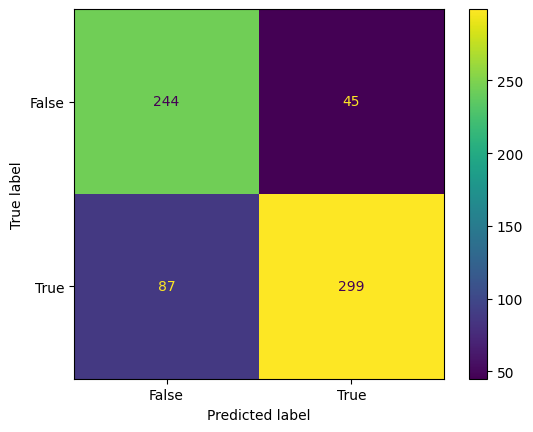

In [231]:
# create confusion matrix
y_val_pred = neigh.predict(x_val)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_val,y_val_pred, labels=neigh.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=neigh.classes_)
disp.plot()
plt.show()

In [232]:
# classification report
#TP = 299
#TN = 244 
#FP = 45 
#FN = 87
from sklearn.metrics import classification_report

print(classification_report(y_val_pred, y_val))

sensitivity = 299/(299+87) # = TP/(TP+FN) TP rate 
specificity = 244/(244+45) # = TN/(TN+FP) TN rate 
print(sensitivity, specificity)

              precision    recall  f1-score   support

       False       0.84      0.74      0.79       331
        True       0.77      0.87      0.82       344

    accuracy                           0.80       675
   macro avg       0.81      0.80      0.80       675
weighted avg       0.81      0.80      0.80       675

0.7746113989637305 0.8442906574394463


In [274]:
#selecting the right k function 

def chooseK(k, x_train, y_train, x_test, y_test):
    random.seed(1)
    print("calculating... ", k, "k") 
    class_knn = KNeighborsClassifier(n_neighbors=k)
    class_knn.fit(x_train, y_train)
    # calculate accuracy
    accu = class_knn.score(x_test, y_test)
    return accu

In [245]:
#testing k values from 1 to 50
test = pd.DataFrame({'k':list(range(1,51,2)),'accu':[chooseK(i, x_train, y_train, x_test, y_test) for i in list(range(1, 51, 2))]})

calculating...  1 k
calculating...  3 k
calculating...  5 k
calculating...  7 k
calculating...  9 k
calculating...  11 k
calculating...  13 k
calculating...  15 k
calculating...  17 k
calculating...  19 k
calculating...  21 k
calculating...  23 k
calculating...  25 k
calculating...  27 k
calculating...  29 k
calculating...  31 k
calculating...  33 k
calculating...  35 k
calculating...  37 k
calculating...  39 k
calculating...  41 k
calculating...  43 k
calculating...  45 k
calculating...  47 k
calculating...  49 k


In [246]:
#k value results 
print(test.head())

   k      accu
0  1  0.734421
1  3  0.755193
2  5  0.759644
3  7  0.770030
4  9  0.761128


In [248]:
#optimal k value is 31
test = test.sort_values(by=['accu'], ascending=False)
print(test.head())

     k      accu
15  31  0.801187
17  35  0.799703
16  33  0.799703
21  43  0.798220
19  39  0.798220


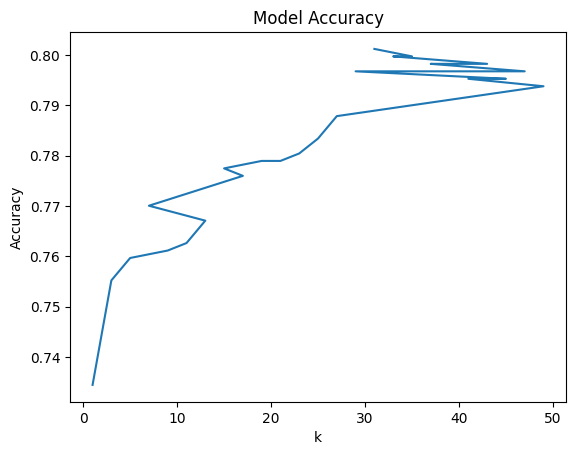

In [250]:
#plotting k accuracies 
plt.plot(test['k'], test['accu'])
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.show()

In [252]:
#predictions for each sample
test_probs = neigh.predict_proba(x_test) #x_test = test['aid_value'].values.reshape(-1, 1)
test_preds = neigh.predict(x_test)

# convert probabilities to pd df
test_probabilities = pd.DataFrame(test_probs, columns = ['level_2-year','level_4-year'])
test_probabilities.head()

,level_2-year,level_4-year
0,0.5,0.5
1,0.9,0.1
2,0.0,1.0
3,0.0,1.0
4,0.7,0.3


In [253]:
#actual class, predicted class, and predicted class probabilities in a df 
final_model = pd.DataFrame({'actual_class': y_test.tolist(),
'pred_class': test_preds.tolist(),
'pred_prob': test_probabilities['level_4-year']})
final_model.head()

,actual_class,pred_class,pred_prob
0,False,False,0.5
1,False,False,0.1
2,False,True,1.0
3,True,True,1.0
4,False,False,0.3


In [254]:
# convert classes to categories
final_model.actual_class = final_model.actual_class.astype('category')
final_model.pred_class = final_model.pred_class.astype('category')

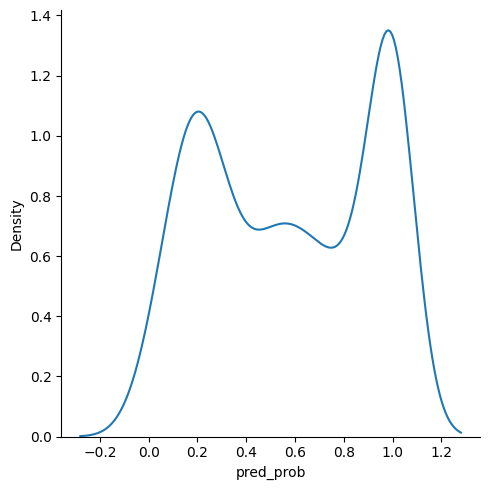

In [255]:
# probability distribution graph 
sns.displot(final_model, x="pred_prob", kind="kde")

In [256]:
#how many predictions for each probability 
print(final_model.pred_prob.value_counts())

pred_prob
1.0    185
0.2     96
0.1     62
0.3     60
0.5     52
0.6     49
0.7     44
0.9     38
0.8     35
0.4     34
0.0     19
Name: count, dtype: int64


In [257]:
#function to adjust thresholds 
def adjust_thres(x, y, z):
    """
    x=pred_probabilities
    y=threshold
    z=tune_outcome
    """
    thres = pd.DataFrame({'new_preds': [1 if i > y else 0 for i in x]})
    thres.new_preds = thres.new_preds.astype('category')
    con_mat = confusion_matrix(z, thres)
    print(con_mat)

In [258]:
# confusion matrix for original model 
# [[True Negatives (TN), False Positives (FP)],
# [False Negatives (FN), True Positives (TP)]]
confusion_matrix(final_model.actual_class, final_model.pred_class) 

array([[223,  65],
       [100, 286]], dtype=int64)

In [273]:
#testing thresholds 
# if the predicted probability for the positive class is greater than or equal to 0.5, the data point is classified as the positive class; otherwise, it's classified as the negative class
adjust_thres(final_model.pred_prob, .90, final_model.actual_class) # raise threshold

adjust_thres(final_model.pred_prob, .60, final_model.actual_class) # lower threshold

[[284   4]
 [205 181]]
[[248  40]
 [124 262]]


In [261]:
# with .80 threshold, results were 
#[[278   10]
# [173 213]]

# a difference was made .90 threshold was reached, but no difference was made between .80 and .89
#[[283   5]
# [188 198]]

# with .40 threshold results were
#[[202  86]
# [69 317]]

# with .60 threshold results were
#[[248  40]
# [124 262]]

#the default threshold (a threshold of .50) looks to have a relatively high distribution of both TP and TN 
# [[223  65]
# [100 286]]

# IThere is a relationship between aid value and 4-year institutions. I originally thought that there would be greater aid value given in 4-year institutions becuase more years = more aid. While that is typically true, I believe there are other variables that have a more direct relationship with determining a 2-year or 4-year institution such as student population.
